In [3]:
import pandas as pd
import numpy as np

from scipy.fft import fft
from scipy.stats import skew, kurtosis
import statistics as stc

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import configparser

In [32]:
config = configparser.ConfigParser()
config.read('config.ini')
FRAME_SIZE = config.getint('Default', 'FRAME_SIZE')
PATH_DATA_TO_PREDICT= config.get('Paths', 'PATH_DATA_TO_PREDICT')
PATH_PROCESSED_DATA = config.get('Paths', 'PATH_PROCESSED_DATA')
PATH_PROCESSED_SCHEMA = config.get('Paths', 'PATH_PROCESSED_SCHEMA')

In [5]:
## data paths loading

# Wear files
acier_usure_120_100 = "row_data/wear/26'_2022_01_11_171848_120%_100%_S_US.xlsx"
acier_usure_75_75 = "row_data/wear/27_2022_01_11_173748_75%_75%_S_US.xlsx"
acier_usure_50_50 = "row_data/wear/28_2022_01_11_180139_50%_50%_S_US.xlsx"
acier_usure_50_100 = "row_data/wear/36_2022_01_12_120232_50%_100%_S_US.xlsx"
acier_usure_120_50 = "row_data/wear/37_2022_01_12_123547_120%_50%_S_US.xlsx"


# No wear files
acier_simp_120_100 = "row_data/no_wear/01_2022_01_10_092455_120%_100%_S.xlsx"
acier_simp_50_100 = "row_data/no_wear/04_2022_01_10_101238_50%_100%_S.xlsx"
acier_simp_75_75 = "row_data/no_wear/07_2022_01_10_111456_75%_75%_S.xlsx"
acier_simp_120_50 = "row_data/no_wear/09_2022_01_10_115034_120%_50%_S.xlsx"
acier_simp_50_50 = "row_data/no_wear/12_2022_01_10_130747_50%_50%_S.xlsx"

In [6]:
def load_df(link):
    data_frames = []
    excel_file = pd.ExcelFile(link)
    print(excel_file.sheet_names)
    sheets = excel_file.sheet_names[:len(excel_file.sheet_names)-2]
    print(f'Sheets : {sheets}')
    for i in range(len(sheets)-1, -1, -1):
        data = excel_file.parse(sheets[i])
        data = data.drop(data.index[0])
        data_frames.append(data)
        merged_data = pd.concat(data_frames, ignore_index=True)
        merged_data["Time"] = merged_data["Time"].astype(float)
        merged_data["acc_broche"] = merged_data["acc_broche"].astype(float)
        merged_data["acc_table"] = merged_data["acc_table"].astype(float)
    return merged_data

In [7]:
# With wear data
us_120_100 = load_df(acier_usure_120_100)
us_75_75 = load_df(acier_usure_75_75) #df d'expé sur de l'acier usé à 75%, 75% et avec lubrifiant
us_50_50 = load_df(acier_usure_50_50)
us_50_100 = load_df(acier_usure_50_100)
us_120_50 = load_df(acier_usure_120_50)

# Without wear data
nus_120_100 = load_df(acier_simp_120_100)
nus_50_100 = load_df(acier_simp_50_100)
nus_75_75 = load_df(acier_simp_75_75) #df d'expé sur de l'acier à 75%, 75% et avec lubrifiant
nus_120_50 = load_df(acier_simp_120_50)
nus_50_50 = load_df(acier_simp_50_50)

['Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-1', 'Data1']
['Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-1', 'Data1']
['Data1-2', 'Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-2', 'Data1-1', 'Data1']
['Data1-2', 'Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-2', 'Data1-1', 'Data1']
['Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-1', 'Data1']
['Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-1', 'Data1']
['Data1-2', 'Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-2', 'Data1-1', 'Data1']
['Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-1', 'Data1']
['Data1-2', 'Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-2', 'Data1-1', 'Data1']
['Data1-2', 'Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-2', 'Data1-1', 'Data1']


In [8]:
# Get last sequence as test set
def getseq(df, lower_bound, upper_bound):
    X = df[df["Time"].between(lower_bound, upper_bound)]
    return X

#def nullvalues(df1, df2):
    

In [9]:
def plot_data(df):
    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
    ax1.plot(df['Time'], df[['acc_broche', 'acc_table']])
    ax1.set_title('Train set')
    plt.show()

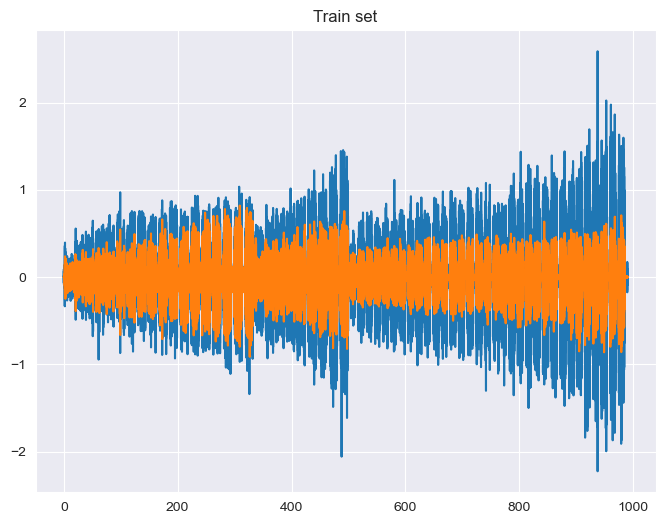

In [10]:
lower_bound = 000.0000
upper_bound = 990.0000
nus_50_50_set = getseq(nus_50_50, lower_bound, upper_bound)
plot_data(nus_50_50_set)

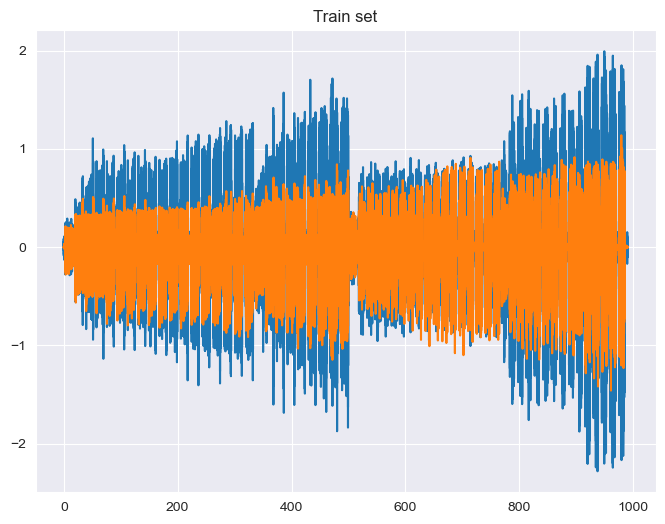

In [11]:
lower_bound = 000.0000
upper_bound = 990.0000
nus_120_50_set = getseq(nus_120_50, lower_bound, upper_bound)
plot_data(nus_120_50_set)

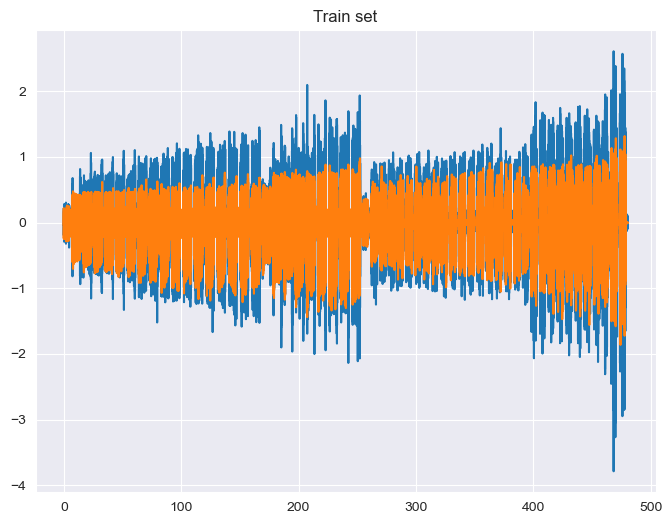

In [12]:
lower_bound = 000.0000
upper_bound = 480.0000
nus_75_75_set = getseq(nus_75_75, lower_bound, upper_bound)
plot_data(nus_75_75_set)

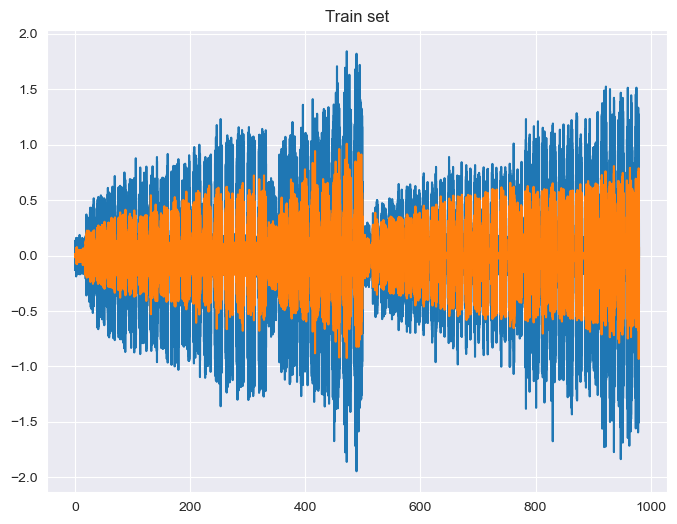

In [13]:
lower_bound = 000.0000
upper_bound = 980.0000
nus_50_100_set = getseq(nus_50_100, lower_bound, upper_bound)
plot_data(nus_50_100_set)

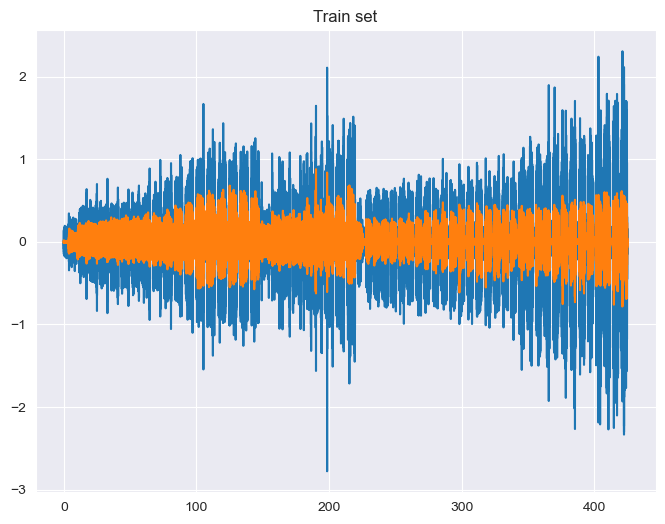

In [14]:
lower_bound = 000.0000
upper_bound = 425.0000
nus_120_100_set = getseq(nus_120_100, lower_bound, upper_bound)
plot_data(nus_120_100_set)

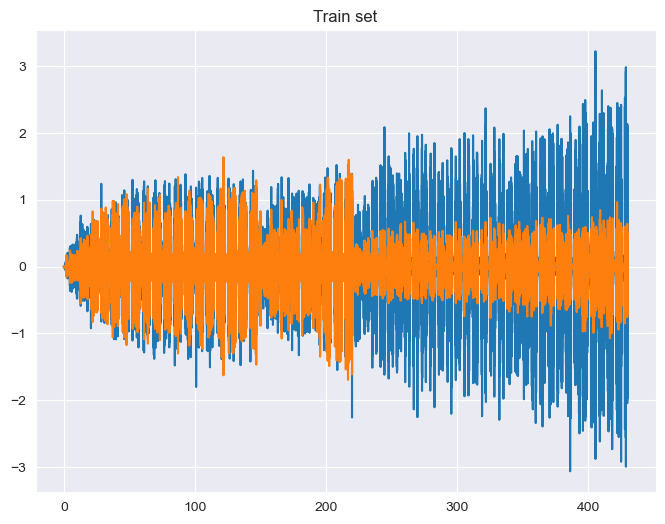

In [15]:
lower_bound = 000.0000
upper_bound = 430.0000
us_120_50_set = getseq(us_120_50, lower_bound, upper_bound)
plot_data(us_120_50_set)

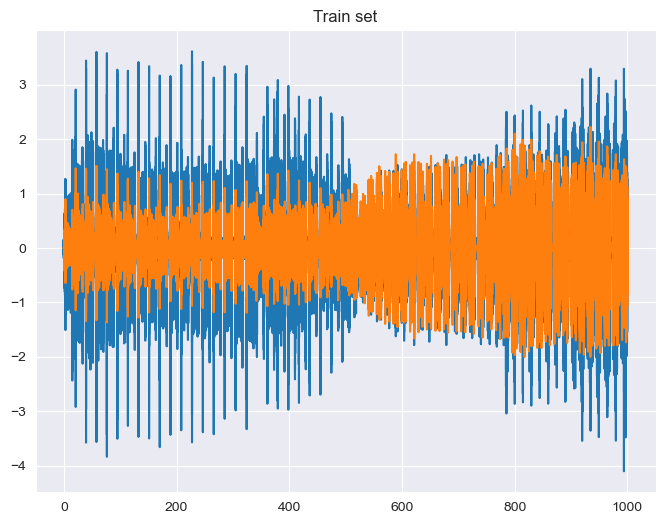

In [16]:
lower_bound = 000.0000
upper_bound = 1000.0000
us_50_100_set = getseq(us_50_100, lower_bound, upper_bound)
plot_data(us_50_100_set)

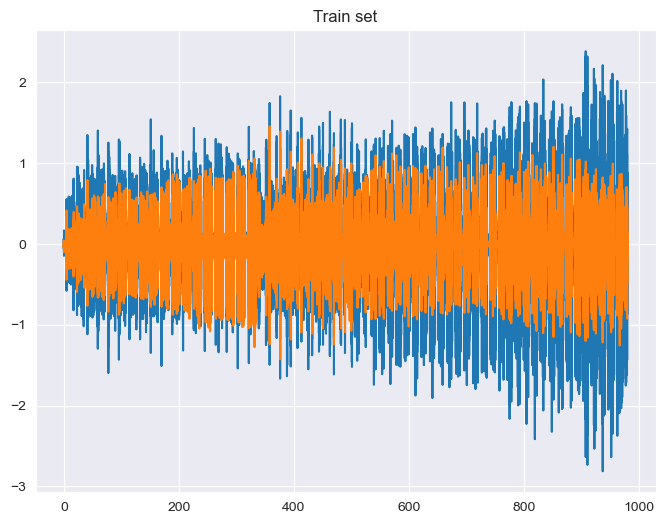

In [17]:
lower_bound = 000.0000
upper_bound = 980.0000
us_50_50_set = getseq(us_50_50, lower_bound, upper_bound)
plot_data(us_50_50_set)

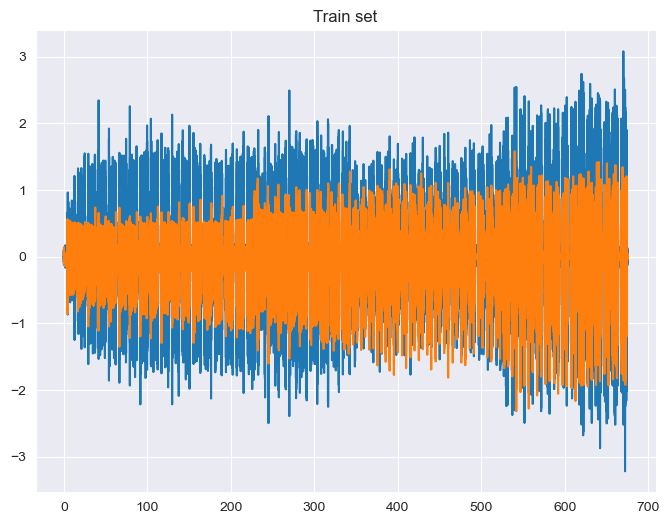

In [18]:
lower_bound = 000.0000
upper_bound = 675.0000
us_75_75_set = getseq(us_75_75, lower_bound, upper_bound)
plot_data(us_75_75_set)

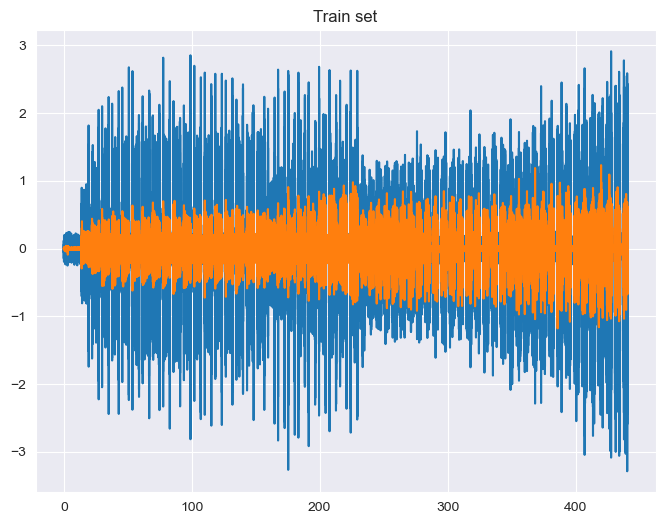

In [19]:
##
lower_bound = 000.0000
upper_bound = 440.5000
us_120_100_set = getseq(us_120_100, lower_bound, upper_bound)
plot_data(us_120_100_set)

In [21]:
from datastats.preprocessor import dataTransformer

Number of feature extruction methods:  13


In [22]:
def create_train_test(df):
    X_train = df[0: int(len(df)*0.7)]
    X_test = df[int(len(df)*0.3):]
    return X_train, X_test

In [23]:
## Dataset creation for signals with weared tool

df_us_120_100 = dataTransformer(us_120_100_set["acc_broche"], us_120_100_set["acc_table"])
df_us_120_100["wear"] = 1
us_120_100_train, us_120_100_test = create_train_test(df_us_120_100)

df_us_75_75 = dataTransformer(us_75_75_set["acc_broche"], us_75_75_set["acc_table"])
df_us_75_75["wear"] = 1
us_75_75_train, us_75_75_test = create_train_test(df_us_75_75)

df_us_50_50 = dataTransformer(us_50_50_set["acc_broche"], us_50_50_set["acc_table"])
df_us_50_50["wear"] = 1
us_50_50_train, us_50_50_test = create_train_test(df_us_50_50)

df_us_50_100 = dataTransformer(us_50_100_set["acc_broche"], us_50_100_set["acc_table"])
df_us_50_100["wear"] = 1
us_50_100_train, us_50_100_test = create_train_test(df_us_50_100)

df_us_120_50 = dataTransformer(us_120_50_set["acc_broche"], us_120_50_set["acc_table"])
df_us_120_50["wear"] = 1
us_120_50_train, us_120_50_test = create_train_test(df_us_120_50)

In [24]:
## Dataset creation for signals with no weared tool

df_nus_120_100 = dataTransformer(nus_120_100_set["acc_broche"], nus_120_100_set["acc_table"])
df_nus_120_100["wear"] = 0
nus_120_100_train, nus_120_100_test = create_train_test(df_nus_120_100)

df_nus_50_100 = dataTransformer(nus_50_100_set["acc_broche"], nus_50_100_set["acc_table"])
df_nus_50_100["wear"] = 0
nus_50_100_train, nus_50_100_test = create_train_test(df_nus_50_100)

df_nus_75_75 = dataTransformer(nus_75_75_set["acc_broche"], nus_75_75_set["acc_table"])
df_nus_75_75["wear"] = 0
nus_75_75_train, nus_75_75_test = create_train_test(df_nus_75_75)

df_nus_120_50 = dataTransformer(nus_120_50_set["acc_broche"], nus_120_50_set["acc_table"])
df_nus_120_50["wear"] = 0
nus_120_50_train, nus_120_50_test = create_train_test(df_nus_120_50)

df_nus_50_50 = dataTransformer(nus_50_50_set["acc_broche"], nus_50_50_set["acc_table"])
df_nus_50_50["wear"] = 0
nus_50_50_train, nus_50_50_test = create_train_test(df_nus_50_50)

In [25]:
data_to_predict = pd.concat([us_120_100_train.head(), nus_120_100_train.head(), us_75_75_train.head(), nus_50_100_train.head(), us_50_50_train.head(), nus_75_75_train.head(), us_50_100_train.head(), nus_120_50_train.head(), us_120_50_train.head(), nus_50_50_train.head()], axis=0, ignore_index=True)

In [26]:
data_to_predict

,Mean_b,STD_b,Variance_b,RMS_b,Peak_val_b,Skewness_b,Kurtosis_b,Crest_factor_b,Margin_factor_b,SHape_factor_b,...,Peak_val_t,Skewness_t,Kurtosis_t,Crest_factor_t,Margin_factor_t,SHape_factor_t,Impulse_factor_t,A_factor_t,B_factor_t,wear
0,0.231680,0.060606,4.356046,0.060606,0.003673,0.053758,0.005995,0.275552,4.840777,5787.244362,...,0.003673,0.053758,0.005995,0.275552,4.840777,5787.244362,-0.000176,1040.748012,0.430833,1
1,0.245872,0.061711,-53.312761,0.061710,0.003808,-0.004700,0.019759,0.277932,5.082121,6132.576924,...,0.003808,-0.004700,0.019759,0.277932,5.082121,6132.576924,-0.000383,1046.288876,-17.069127,1
2,0.222157,0.056730,-5.047559,0.056730,0.003218,-0.044013,0.056726,0.267512,4.939971,5706.995471,...,0.003218,-0.044013,0.056726,0.267512,4.939971,5706.995471,0.000036,1216.823670,-5.046742,1
3,0.224365,0.058176,-3.609135,0.058174,0.003384,-0.066311,0.134776,0.270363,5.168873,6037.656468,...,0.003384,-0.066311,0.134776,0.270363,5.168873,6037.656468,0.000475,1139.649141,-8.360707,1
4,0.209168,0.059585,-5.068019,0.059582,0.003550,-0.048860,-0.073512,0.272744,5.188281,6151.753570,...,0.003550,-0.048860,-0.073512,0.272744,5.188281,6151.753570,-0.000653,988.913457,6.252307,1
5,0.193393,0.054172,-9.096728,0.054162,0.002934,-0.021927,-0.016339,0.260335,4.606593,5201.484268,...,0.002934,-0.021927,-0.016339,0.260335,4.606593,5201.484268,-0.001015,1217.169859,2.743981,0
6,0.343727,0.070574,-37.419632,0.070572,0.004980,-0.009233,0.599843,0.300973,6.283229,8052.222588,...,0.004980,-0.009233,0.599843,0.300973,6.283229,8052.222588,0.000566,977.952292,-318.025462,0
7,0.293032,0.079085,4.969035,0.079085,0.006254,0.061792,0.012451,0.314614,4.859276,6632.719832,...,0.006254,0.061792,0.012451,0.314614,4.859276,6632.719832,0.000067,592.416746,0.782247,0
8,0.278147,0.069052,9.309169,0.069052,0.004768,0.038151,0.163521,0.294303,6.451408,8218.334073,...,0.004768,0.038151,0.163521,0.294303,6.451408,8218.334073,-0.000084,844.792675,22.042820,0
9,0.395998,0.090493,6.616671,0.090493,0.008189,0.075940,2.196058,0.354107,7.693890,10958.321604,...,0.008189,0.075940,2.196058,0.354107,7.693890,10958.321604,-0.000127,534.372048,160.554965,0


In [27]:
data_train = pd.concat([us_120_100_train.drop(us_120_100_train.index[:5]), nus_120_100_train.drop(nus_120_100_train.index[:5]), us_75_75_train.drop(us_75_75_train.index[:5]), nus_50_100_train.drop(nus_50_100_train.index[:5]), us_50_50_train.drop(us_50_50_train.index[:5]), nus_75_75_train.drop(nus_75_75_train.index[:5]), us_50_100_train.drop(us_50_100_train.index[:5]), nus_120_50_train.drop(nus_120_50_train.index[:5]), us_120_50_train.drop(us_120_50_train.index[:5]), nus_50_50_train.drop(nus_50_100_train.index[:5])], axis=0, ignore_index=True)


data_test = pd.concat([us_120_100_test, nus_120_100_test, us_75_75_test, nus_50_100_test, us_50_50_test, nus_75_75_test, us_50_100_test, nus_120_50_test, us_120_50_test, nus_50_50_test], axis=0, ignore_index=True)

In [28]:
a = list(data_train.columns)
target = a.pop()
features_name = a

In [29]:
X_train = data_train[features_name]
Y_train = data_train[target]

X_test = data_test[features_name]
Y_test = data_test[target]

In [33]:
X_val = data_to_predict[features_name]
Y_val = data_to_predict[target]

In [30]:
# Save the schema corresponding to the preprocessed data
with open(PATH_PROCESSED_SCHEMA, 'wb') as file:
    pickle.dump((features_name, target), file)

In [31]:
# Save the preprocessed data
with open(PATH_PROCESSED_DATA, 'wb') as file:
    pickle.dump((X_train, X_test, Y_train, Y_test), file)

In [34]:
# Save the data to predict
with open(PATH_DATA_TO_PREDICT, 'wb') as file:
    pickle.dump((X_val, Y_val), file)